# Module 6: Support Vector Machine in cybesecurity Exercise                  
                                
                     




## 1. Sources of Cybersecurity Data
Typical sources of data used in cybersecurity include:

In [1]:
# Load a sample from CICIDS2017 (must be downloaded beforehand)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(43)  # For reproducibility
# Replace with actual path if you have the dataset
logs_df= pd.read_csv("CICIDS2017_sample.csv")
logs_df.head()


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Step 1: Data Profiling

In [2]:
from scipy import stats  # Import stats from scipy

# Profile the dataset
print("Basic Info:")
print(logs_df.info())

print("\nDescriptive Statistics:")
print(logs_df.describe(include='all'))

print("\nMissing Values:")
print(logs_df.isnull().sum())

print("\nUnique values in each column:")
print(logs_df.nunique())

print("Duplicates:")
print(logs_df.duplicated().sum())


# Select numeric columns only
numeric_cols = logs_df.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numeric_cols))

# Count outliers (values with z-score > 7)
outliers = (z_scores > 7)
num_outliers = np.sum(outliers)

print(f"Number of outliers: {num_outliers}")



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                11950 non-null  int64  
 1   Total Fwd Packets            11950 non-null  int64  
 2   Total Backward Packets       11950 non-null  int64  
 3   Total Length of Fwd Packets  11950 non-null  int64  
 4   Total Length of Bwd Packets  11950 non-null  int64  
 5   Fwd Packet Length Max        11950 non-null  int64  
 6   Fwd Packet Length Min        11950 non-null  int64  
 7   Fwd Packet Length Mean       11950 non-null  float64
 8   Fwd Packet Length Std        11950 non-null  float64
 9   Bwd Packet Length Max        11950 non-null  int64  
 10  Bwd Packet Length Min        11950 non-null  int64  
 11  Bwd Packet Length Mean       11950 non-null  float64
 12  Bwd Packet Length Std        11950 non-null  float64
 13  Flow

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1127: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


## Step 2: Data Cleaning

In [3]:
from scipy import stats
import numpy as np

# Replace empty strings and inconsistent protocol names
logs_df.replace("", np.nan, inplace=True)

# Drop rows with critical missing or invalid Flow Duration

logs_df = logs_df[logs_df['Flow Duration'] > 0].dropna(subset=['Flow Duration'])
# Drop rows with critical missing or invalid Total Fwd Packets
df = logs_df[logs_df['Total Fwd Packets'] > 0].dropna(subset=['Total Fwd Packets'])

# Fix missing values in numerical columns by filling with the median
numerical_cols = logs_df.select_dtypes(include=['float64', 'int64']).columns
logs_df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
logs_df.reset_index(drop=True, inplace=True)

# Remove duplicates rows
logs_df = logs_df.drop_duplicates()

# Remove duplicates columns
logs_df = logs_df.T.drop_duplicates().T

logs_df.head()


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.5,17.67767,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


## Encode Categorical columns

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Encode 'Label' column
if 'Label' in logs_df.columns:
    logs_df['Label'] = le.fit_transform(logs_df['Label'])
logs_df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.5,17.67767,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Data visualization

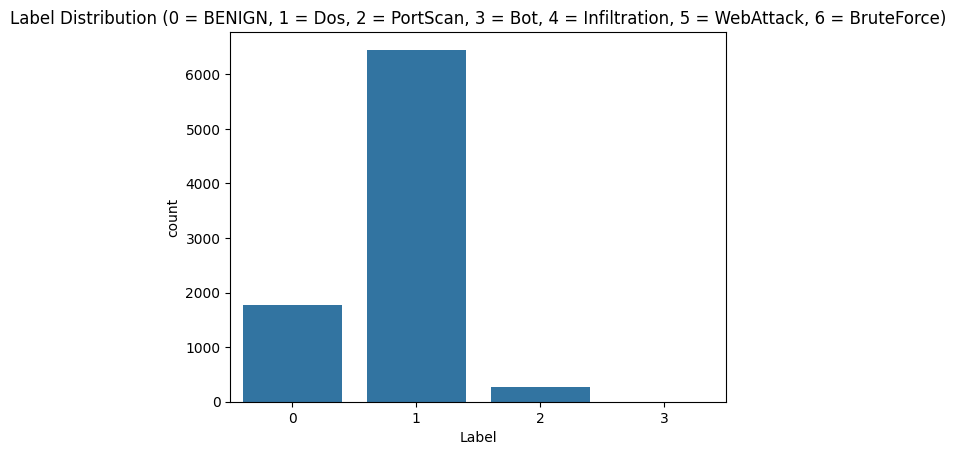

In [5]:
# Visualize Attack distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Label', data=logs_df).set_title('Label Distribution')
plt.title('Label Distribution (0 = BENIGN, 1 = Dos, 2 = PortScan, 3 = Bot, 4 = Infiltration, 5 = WebAttack, 6 = BruteForce)')
plt.show()

## Step 3: Data Transformation

In [ ]:
# Transform data (feature engineering)
#logs_df['Fwd Packet Length Min'] = np.min(logs_df['Total Length of Fwd Packets']) # take the min value of Total Length of Fwd Packets as Fwd Packet Length Min
#logs_df['Fwd Packet Length Max'] = np.max(logs_df['Total Length of Fwd Packets']) # take the max value of Total Length of Fwd Packets as Fwd Packet Length Max
#logs_df['Fwd Packet Length Mean'] = np.mean(logs_df['Total Length of Fwd Packets']) # take the mean value of Total Length of Fwd Packets as Fwd Packet Length Mean
#logs_df['Fwd Packet Length Std'] = np.std(logs_df['Total Length of Fwd Packets']) # take the std value of Total Length of Fwd Packets as Fwd Packet Length Std
# Ensure the column is numeric
#logs_df['Total Length of Bwd Packets'] = pd.to_numeric(logs_df['Total Length of Bwd Packets'], errors='coerce')

# Drop rows with NaN values in the column (if any)
#logs_df = logs_df.dropna(subset=['Total Length of Bwd Packets'])

# Apply log transformation
#logs_df['Bwd Packet Length Max'] = np.log1p(logs_df['Total Length of Bwd Packets'])  # log-transform the Total Length of Bwd Packets to create Bwd Packet Length Max
#logs_df['Bwd Packet Length Min'] = np.log1p(logs_df['Total Length of Bwd Packets'])  # log-transform the Total Length of Bwd Packets to create Bwd Packet Length Min
#logs_df['Bwd Packet Length Mean'] = np.log1p(logs_df['Total Length of Bwd Packets'])  # log-transform the Total Length of Bwd Packets to create Bwd Packet Length Mean
#logs_df['Bwd Packet Length Std'] = np.log1p(logs_df['Total Length of Bwd Packets'])  # log-transform the Total Length of Bwd Packets to create Bwd Packet Length Std
#logs_df['Fwd Packet Length Var'] = np.var(logs_df['Total Length of Fwd Packets']) # take the var value of Total Length of Fwd Packets as Fwd Packet Length Var
#logs_df['Bwd Packet Length Var'] = np.var(logs_df['Total Length of Bwd Packets']) # take the var value of Total Length of Bwd Packets as Bwd Packet Length Var
#logs_df['Fwd Packet Length Max'] = np.max(logs_df['Total Length of Fwd Packets']) # take the max value of Total Length of Fwd Packets as Fwd Packet Length Max
# Encode Labels
#logs_df = pd.get_dummies(logs_df, columns=['Label'], prefix='Lab')
#logs_df

## Step 4: Data Reduction

## Step 5: Data Enrichment

In [ ]:
# Enrich data by creating new features
#logs_df['Flow Duration (seconds)'] = logs_df['Flow Duration'] / 1e6  # Convert Flow Duration to seconds
#logs_df['Packet Length Ratio'] = logs_df['Total Length of Fwd Packets'] / (logs_df['Total Length of Bwd Packets'] + 1)  # Avoid division by zero
#logs_df['Total Packets'] = logs_df['Total Fwd Packets'] + logs_df['Total Backward Packets']  # Total number of packets
#logs_df['Fwd Packet Length Var'] = logs_df['Fwd Packet Length Std'] ** 2  # Variance of Fwd Packet Length
#logs_df['Bwd Packet Length Var'] = logs_df['Bwd Packet Length Std'] ** 2  # Variance of Bwd Packet Length

# Display enriched data
#logs_df

## Step 6: Data Validation

In [7]:
# Cell 6: Validate final data

# Ensure numerical_cols is defined
numerical_cols = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets']  # Replace with the correct numerical columns in your dataset

# Fix negative values in numerical columns by replacing them with 0
logs_df[numerical_cols] = logs_df[numerical_cols].clip(lower=0)

# Perform validation checks
assert logs_df.isnull().sum().sum() == 0, "❌ Data contains missing values!"
assert (logs_df[numerical_cols] >= 0).all().all(), "❌ Numerical columns contain negative values!"
assert logs_df['Flow Duration'].min() > 0, "❌ Flow Duration contains non-positive values!"
assert logs_df['Total Fwd Packets'].min() > 0, "❌ Total Fwd Packets contains non-positive values!"
assert logs_df['Total Backward Packets'].min() >= 0, "❌ Total Backward Packets contains negative values!"

print("✅ Data validation passed.")

✅ Data validation passed.


## Step 2: Data Preprocessing

In [8]:
# Preprocessing the enhanced dataset

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer
# Encode categorical variables safely
label_cols = ['Label']
label_encoder = LabelEncoder()

for col in label_cols:
    if col in logs_df.columns:
        logs_df[col] = label_encoder.fit_transform(logs_df[col].astype(str))

# Drop low-importance features (avoiding duplicates)
drop_cols = [
    'Fwd Packet Length Min', 'Fwd Packet Length Max', 'Fwd Packet Length Mean',
    'Fwd Packet Length Std', 'Bwd Packet Length Min', 'Bwd Packet Length Max',
    'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std',
    'Fwd Packet Length Var', 'Bwd Packet Length Var',  # if these exist
    'Total Fwd Packets', 'Total Length of Bwd Packets', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
    'RST Flag Count', 'Active Max', 'Idle Min'
]
logs_df_cleaned = logs_df.drop(columns=[col for col in drop_cols if col in logs_df.columns])

# Convert all columns except 'Label' to numeric, coerce errors to NaN
for col in logs_df_cleaned.columns:
    if col not in label_cols:
        logs_df_cleaned[col] = pd.to_numeric(logs_df_cleaned[col], errors='coerce')

# Identify numeric columns for scaling (ensure they exist)
numeric_cols = [col for col in logs_df_cleaned.select_dtypes(include=['float64', 'int64']).columns if col not in label_cols]

# Impute missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
logs_df_cleaned[numeric_cols] = imputer.fit_transform(logs_df_cleaned[numeric_cols])

# Normalize numeric columns
scaler = StandardScaler()
logs_df_cleaned[numeric_cols] = scaler.fit_transform(logs_df_cleaned[numeric_cols])

# Final cleaned and processed dataset
logs_df_cleaned.head()


,Flow Duration,Total Backward Packets,Total Length of Fwd Packets,Flow Bytes/s,Flow Packets/s,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Min,Idle Mean,Idle Std,Idle Max,Label
0,-0.520863,-0.287636,-0.136646,0.565690,5.155822,-0.514818,-0.027520,-0.505314,-0.513198,-0.522856,...,-0.129747,-0.254245,-0.316893,-0.240731,-0.046737,-0.237923,-0.478634,-0.294573,-0.486805,0
1,-0.516336,4.478360,0.523950,0.014591,-0.108511,-0.513966,-0.027526,-0.500779,-0.512540,-0.522121,...,-0.115080,2.993334,-0.316893,-0.240731,-0.046737,-0.237923,-0.478634,-0.294573,-0.486805,0
2,-0.517083,1.864749,0.443940,-0.009029,-0.111985,-0.513957,-0.027521,-0.501528,-0.512074,-0.521906,...,-0.115080,0.081712,2.660822,-0.240731,-0.046737,-0.237923,-0.478634,-0.294573,-0.486805,0
3,-0.516298,3.940264,0.511641,0.014820,-0.109312,-0.513965,-0.027523,-0.500742,-0.512487,-0.522093,...,-0.115080,2.545392,-0.316893,-0.240731,-0.046737,-0.237923,-0.478634,-0.294573,-0.486805,0
4,-0.516292,4.247747,0.527027,0.016083,-0.108587,-0.513930,-0.027523,-0.500736,-0.512575,-0.522131,...,-0.115080,3.105320,-0.316893,-0.240731,-0.046737,-0.237923,-0.478634,-0.294573,-0.486805,0


## Step 3: Splitting the Dataset

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Supposons que logs_df_cleaned est déjà défini

# 1. Vérifier la distribution des classes
label_counts = logs_df_cleaned['Label'].value_counts()
print("Classement initial des labels :\n", label_counts)

# 2. Supprimer les classes trop rares (moins de 3 instances)
rare_classes = label_counts[label_counts < 3].index
logs_df_cleaned = logs_df_cleaned[~logs_df_cleaned['Label'].isin(rare_classes)]

# 3. Redéfinir X et y
X = logs_df_cleaned.drop(columns=['Label'])
y = logs_df_cleaned['Label']  # Série, pas DataFrame

# 4. Split stratifié : 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# 5. Afficher les dimensions
print(f"Training set:   X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test set:       X_test={X_test.shape}, y_test={y_test.shape}")

# 6. Vérifier que la stratification a bien fonctionné
print("\nRépartition des labels :")
print("Train:\n", y_train.value_counts(normalize=True))
print("Val:\n", y_val.value_counts(normalize=True))
print("Test:\n", y_test.value_counts(normalize=True))


Classement initial des labels :
 Label
1    6449
0    1766
2     266
3       1
Name: count, dtype: int64
Training set:   X_train=(5088, 44), y_train=(5088,)
Validation set: X_val=(1696, 44), y_val=(1696,)
Test set:       X_test=(1697, 44), y_test=(1697,)

Répartition des labels :
Train:
 Label
1    0.760417
0    0.208137
2    0.031447
Name: proportion, dtype: float64
Val:
 Label
1    0.760613
0    0.208137
2    0.031250
Name: proportion, dtype: float64
Test:
 Label
1    0.760165
0    0.208603
2    0.031232
Name: proportion, dtype: float64



## Main Exercise
## Step 4: Training and Evaluating Support Vector MAchine

In [21]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import time

# Define hyperparameter grid
param_grid = [
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'shrinking': [True]
    },
    {
        'C': [0.1, 1],
        'kernel': ['poly'],
        'gamma': ['scale'],
        'degree': [2, 3],
        'shrinking': [True]
    }
]

# Generate all combinations
param_combinations = [params for grid in param_grid for params in ParameterGrid(grid)]

# Store results
results = []

for i, params in enumerate(param_combinations):
    start = time.time()
    print(f"\n▶️ Training Model {i+1}/{len(param_combinations)}: {params}")

    # Build model
    clf = SVC(
        C=params['C'],
        kernel=params['kernel'],
        gamma=params.get('gamma', 'scale'),
        degree=params.get('degree', 3),
        shrinking=params['shrinking'],
        random_state=42,
        probability=False  # disabling to speed up
    )

    # Fit the model
    clf.fit(X_train, y_train.values.ravel())

    # Predict
    val_preds = clf.predict(X_val)
    test_preds = clf.predict(X_test)

    # Scores
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)

    results.append({
        'params': params,
        'val_accuracy': val_acc,
        'test_accuracy': test_acc
    })

    print(f"✅ Validation Accuracy: {val_acc:.4f}")
    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print("Classification Report (Test):\n", classification_report(y_test, test_preds))
    print(f"⏱️ Time taken: {time.time() - start:.2f} seconds")

# Convert results to DataFrame and sort by test accuracy
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="test_accuracy", ascending=False)

print("\n📌 Top 5 Best Models:")
print(results_df.head())



▶️ Training Model 1/16: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}
✅ Validation Accuracy: 0.9888
✅ Test Accuracy: 0.9864
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       354
           1       0.99      1.00      0.99      1290
           2       0.93      0.94      0.93        53

    accuracy                           0.99      1697
   macro avg       0.97      0.96      0.97      1697
weighted avg       0.99      0.99      0.99      1697

⏱️ Time taken: 0.16 seconds

▶️ Training Model 2/16: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
✅ Validation Accuracy: 0.9811
✅ Test Accuracy: 0.9794
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       354
           1       0.98      1.00      0.99      1290
           2       0.91      0.79      0.85        53

    accuracy        

## Top 5 Models

<ipython-input-23-28d703a2fa22>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='param_str', y='test_accuracy', data=top5, palette='viridis')


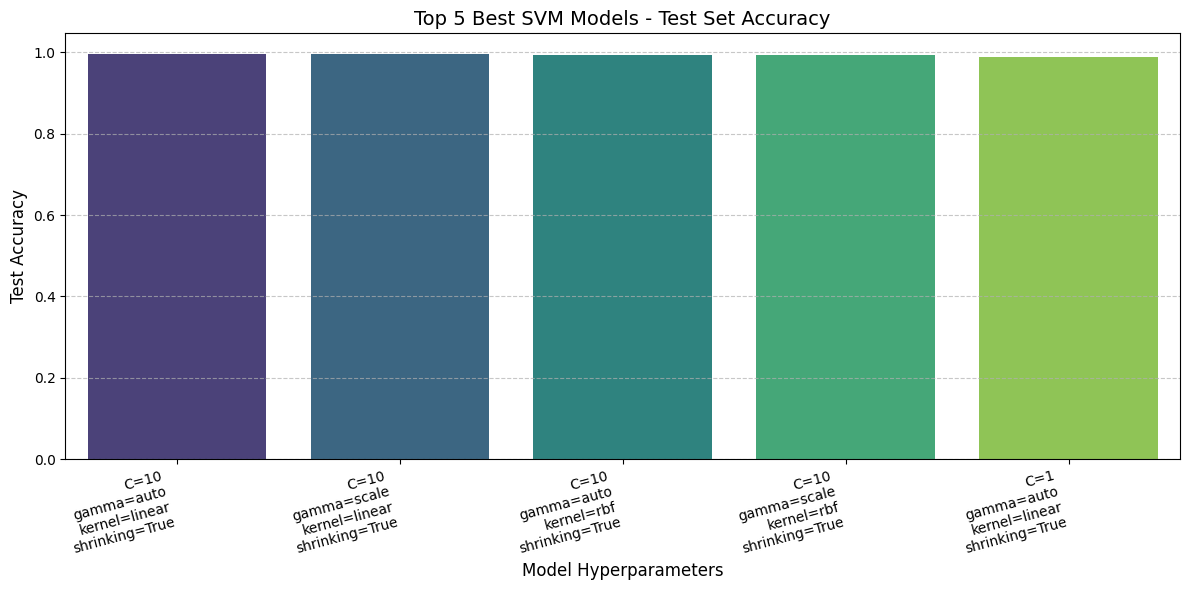

In [23]:
import seaborn as sns

# Select the top 5 models
top5 = results_df.head(5).copy()

# Create a readable string for each model's parameters
top5['param_str'] = top5['params'].apply(lambda x: '\n'.join([f"{k}={v}" for k, v in x.items()]))

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='param_str', y='test_accuracy', data=top5, palette='viridis')

# Styling
plt.title("Top 5 Best SVM Models - Test Set Accuracy", fontsize=14)
plt.ylabel("Test Accuracy", fontsize=12)
plt.xlabel("Model Hyperparameters", fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# 2. Others test

In [27]:
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

# Define hyperparameter ranges for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3],  # Relevant only for 'poly' kernel
    'shrinking': [True, False]
}

# Generate all combinations of parameters
param_combinations = list(ParameterGrid(param_grid))

# Store results for analysis
results = []

# Train and evaluate each model
for i, params in enumerate(param_combinations):
    # Skip 'degree' if kernel is not 'poly'
    if params['kernel'] != 'poly' and 'degree' in params:
        continue

    start_time = time.time()

    # Initialize SVC
    clf = SVC(
        C=params['C'],
        kernel=params['kernel'],
        gamma=params['gamma'],
        degree=params['degree'] if params['kernel'] == 'poly' else 3,
        shrinking=params['shrinking'],
        probability=False,  # disable to speed up
        random_state=42
    )

    # Train the model
    clf.fit(X_train, y_train.values.ravel())

    # Predictions
    val_preds = clf.predict(X_val)
    test_preds = clf.predict(X_test)

    # Accuracy scores
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)

    # Store the result
    results.append({
        'params': params,
        'val_accuracy': val_acc,
        'test_accuracy': test_acc
    })

    # Print summary
    print(f"\n▶️ Model {i+1}/{len(param_combinations)}: {params}")
    print(f"✅ Validation Accuracy: {val_acc:.4f}")
    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print("📊 Classification Report (Test):\n", classification_report(y_test, test_preds))
    print(f"⏱️ Time taken: {time.time() - start_time:.2f} seconds")

# Convert to DataFrame and sort results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='test_accuracy', ascending=False)

# Display top results
print("\n📌 Top 5 Best Models:")
print(results_df.head())



▶️ Model 5/72: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}
✅ Validation Accuracy: 0.9534
✅ Test Accuracy: 0.9582
📊 Classification Report (Test):
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       354
           1       0.95      1.00      0.98      1290
           2       0.96      0.47      0.63        53

    accuracy                           0.96      1697
   macro avg       0.96      0.78      0.84      1697
weighted avg       0.96      0.96      0.95      1697

⏱️ Time taken: 0.58 seconds

▶️ Model 6/72: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': False}
✅ Validation Accuracy: 0.9534
✅ Test Accuracy: 0.9582
📊 Classification Report (Test):
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       354
           1       0.95      1.00      0.98      1290
           2       0.96      0.47      0.63        53

    accu